In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [11]:
!pip install -U --pre efficientnet

In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


In [0]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

path = '/content/drive/My Drive/RA Work/Artwork_data/Original_Separated'
train_path = path+"/train"
test_path= path +"/val"

In [0]:
path = '/content/drive/My Drive/RA Work/Artwork_data'
artists = pd.read_csv(path+'/artists.csv')
artists.shape
artists_top = artists.sort_values(by=['paintings'],ascending=False).reset_index()
#artists_top = artists[artists['paintings']>100]
artists_top = artists_top[['name','paintings']]
artists_top['class_weight'] = artists_top.paintings.sum()/(artists_top.shape[0]*artists_top.paintings)
artists_top

In [5]:
artist = {}
artist_name=[]
for dirname, i, filenames in os.walk(train_path):
  artist_name = i
  print(i)
  break


['Rene_Magritte', 'Sandro_Botticelli', 'Piet_Mondrian', 'Vasiliy_Kandinskiy', 'Vincent_van_Gogh', 'William_Turner', 'Titian', 'Salvador_Dali', 'Raphael', 'Rembrandt', 'Marc_Chagall', 'Mikhail_Vrubel', 'Paul_Cezanne', 'Michelangelo', 'Pieter_Bruegel', 'Paul_Gauguin', 'Paul_Klee', 'Pierre-Auguste_Renoir', 'Peter_Paul_Rubens', 'Pablo_Picasso', 'Henri_Matisse', 'Leonardo_da_Vinci', 'Jan_van_Eyck', 'Henri_Rousseau', 'Kazimir_Malevich', 'Joan_Miro', 'Henri_de_Toulouse-Lautrec', 'Gustav_Klimt', 'Jackson_Pollock', 'Hieronymus_Bosch', 'Frida_Kahlo', 'El_Greco', 'Edvard_Munch', 'Edouard_Manet', 'Giotto_di_Bondone', 'Georges_Seurat', 'Eugene_Delacroix', 'Gustave_Courbet', 'Francisco_Goya', 'Camille_Pissarro', 'Diego_Velazquez', 'Diego_Rivera', 'Andrei_Rublev', 'Andy_Warhol', 'Alfred_Sisley', 'Amedeo_Modigliani', 'Caravaggio', 'Claude_Monet', 'Albrecht', 'Edgar_Degas']


In [0]:
artist_name = artist_name[0:50]
print(len(artist_name))
class_weights={}
for i in range(artists.shape[0]):
  name = artists_top.iloc[i,0].replace(" ","_")
  if name in artist_name:
    print("i:%d,name:%s"%(i,name))
    class_weights[name]=artists_top.iloc[i,2]
class_weights['Albrecht'] = artists_top.iloc[4,2]
print(class_weights)


In [7]:
class_weights_list = []
for name in artist_name:
  class_weights_list.append(class_weights[name])
class_weights_dict = {}
for i in range(50):
  class_weights_dict[i] = class_weights_list[i]
print(class_weights_dict)

{0: 0.8707216494845361, 1: 1.03, 2: 2.010952380952381, 3: 1.9195454545454544, 4: 0.19261117445838086, 5: 2.5593939393939396, 6: 0.6624313725490196, 7: 1.215251798561151, 8: 1.549724770642202, 9: 0.6447328244274809, 10: 0.7067782426778243, 11: 0.9878362573099415, 12: 3.5940425531914895, 13: 3.4473469387755102, 14: 1.2605970149253731, 15: 0.5431511254019292, 16: 0.8985106382978724, 17: 0.5027380952380952, 18: 1.1980141843971632, 19: 0.38478359908883825, 20: 0.9081720430107527, 21: 1.1812587412587412, 22: 2.0854320987654322, 23: 2.4131428571428573, 24: 1.3406349206349206, 25: 1.656078431372549, 26: 2.0854320987654322, 27: 1.4437606837606838, 28: 7.038333333333333, 29: 1.232992700729927, 30: 1.4076666666666666, 31: 1.941609195402299, 32: 2.5211940298507463, 33: 1.8768888888888888, 34: 1.4194957983193277, 35: 3.9283720930232557, 36: 5.449032258064516, 37: 2.863050847457627, 38: 0.5804810996563574, 39: 1.8562637362637362, 40: 1.3196875, 41: 2.4131428571428573, 42: 1.7062626262626264, 43: 0.9

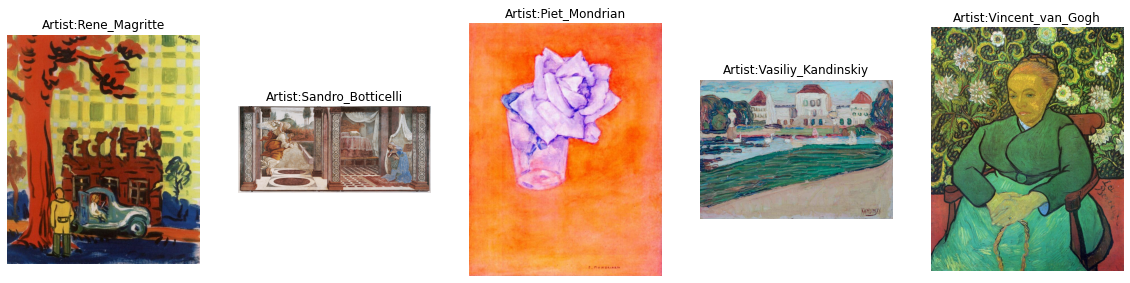

In [8]:
n = 5
fig,axes = plt.subplots(1,n,figsize=(20,10))
for i in range(n):
  random_artist = artist_name[i]
  random_image = random.choice(os.listdir(os.path.join(train_path,random_artist)))
  random_image_file = os.path.join(train_path,random_artist,random_image)
  image = plt.imread(random_image_file)
  axes[i].imshow(image)
  axes[i].set_title("Artist:"+random_artist)
  axes[i].axis('off')
plt.show()

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16 
train_input_shape = (224,224,3)
n_class = len(artist_name)
train_datagen = ImageDataGenerator(rescale = 1./255.,)
train_generator = train_datagen.flow_from_directory(directory=train_path,
                                                    target_size = train_input_shape[0:2],
                                                    class_mode='categorical',
                                                    batch_size=batch_size,
                                                    subset = "training",
                                                    shuffle=True,
                                                    classes=artist_name)
valid_generator = train_datagen.flow_from_directory(directory=test_path,class_mode = 'categorical',
                                                    target_size = train_input_shape[0:2],
                                                    batch_size = batch_size,
                                                    subset = "training",
                                                    shuffle = True,
                                                    classes = artist_name)
#test_generator = train_datagen.flow_from_directory(directory=test_path,class_mode = 'categorical',
#                                                    target_size = train_input_shape[0:2],
#                                                    batch_size = batch_size,
#                                                    subset = "validation",
#                                                    shuffle = True,
#                                                    classes = artist_name)
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = train_generator.n//valid_generator.batch_size
print("Total number of batches =", STEP_SIZE_TRAIN, "and", STEP_SIZE_VALID)

Found 6735 images belonging to 50 classes.
Found 1711 images belonging to 50 classes.
Total number of batches = 420 and 420


In [12]:
#Load pre-train model
import efficientnet.tfkeras as efn
#from keras.applications.resnet import ResNet101
from tensorflow.keras.applications import *
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
import tensorflow as tf

#based_model = ResNet101(weights='imagenet', include_top=False, input_shape=train_input_shape)
based_model = efn.EfficientNetB5(weights='imagenet', include_top=False, input_shape=train_input_shape)

115515392/115515256 [==============================] - 1s 0us/step


In [0]:
for layer in based_model.layers:
    layer.trainable = True
# Add layers at the end
X = based_model.output
X = Flatten()(X)

X = Dense(512, kernel_initializer='he_uniform')(X)
#X = Dropout(0.5)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

X = Dense(128, kernel_initializer='he_uniform')(X)
#X = Dropout(0.5)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

output = Dense(n_class, activation='softmax')(X)

model = Model(inputs=based_model.input, outputs=output)

In [0]:
optimizer = Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
n_epoch = 12

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, 
                           mode='auto', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, 
                              verbose=1, mode='auto')

In [15]:
history1 = model.fit_generator(generator=train_generator,steps_per_epoch=STEP_SIZE_TRAIN,
                               validation_data = valid_generator,validation_steps = STEP_SIZE_VALID,
                               epochs=n_epoch,
                               shuffle=True,
                               verbose = 1,
                               #use_multiprocessing=True,
                               callbacks=[reduce_lr],
                               workers=16,
                               class_weight=class_weights_dict
                               )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/12
420/420 [==============================] - 354s 843ms/step - loss: 3.3036 - accuracy: 0.1698 - val_loss: 2.7472 - val_accuracy: 0.3327 - lr: 1.0000e-04
Epoch 2/12
420/420 [==============================] - 248s 590ms/step - loss: 1.9122 - accuracy: 0.4794 - val_loss: 2.1488 - val_accuracy: 0.4818 - lr: 1.0000e-04
Epoch 3/12
420/420 [==============================] - 250s 595ms/step - loss: 1.1263 - accuracy: 0.6927 - val_loss: 1.8086 - val_accuracy: 0.5906 - lr: 1.0000e-04
Epoch 4/12
420/420 [==============================] - 249s 593ms/step - loss: 0.6736 - accuracy: 0.8190 - val_loss: 1.5641 - val_accuracy: 0.6269 - lr: 1.0000e-04
Epoch 5/12
420/420 [==============================] - 250s 595ms/step - loss: 0.4009 - accuracy: 0.9034 - val_loss: 1.4164 - val_accuracy: 0.6639 - lr: 1.0000e-04
Epoch 6/12
420/420 [==============================] - 250s 596ms/step - loss: 0.2567 - accuracy: 0.9461 - val

In [0]:
#DONT RUN
#Cosine Learning Rate decay 
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
def lr_schedule(epoch):
  #lr = 0.005
  #warm up learing rate
  # if(epoch < 5 and epoch > 0):
  #   lr = lr  epoch  0.2
  #cosine decay
  # else:
  lr = 0.5*(1 + np.cos((epoch/50)*np.pi))*0.001
  print("learning rate:", lr)
  return lr

In [0]:
import numpy as np
from keras.models import load_model

# Freeze core ResNet layers and train again 
for layer in model.layers:
    layer.trainable = False

for layer in model.layers[:101]:
    layer.trainable = True

optimizer = Adam(learning_rate=0.00001)
#optimizer = Adam(learning_rate=lr_schedule(0))
#lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

n_epoch = 8
history2 = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator, validation_steps=STEP_SIZE_VALID,
                              epochs=n_epoch,
                              shuffle=True,
                              verbose=1,
                              callbacks=[reduce_lr, early_stop],
                              #use_multiprocessing=True,
                              workers=16,
                              class_weight=class_weights_dict
                             )

In [0]:
score = model.evaluate_generator(train_generator, verbose=1)
print("Prediction accuracy on train data =", score[1])

In [0]:
score = model.evaluate_generator(valid_generator, verbose=1)
print("Prediction accuracy on TEST data =", score[1])

In [0]:
history = {}
history['loss'] = history1.history['loss'] + history2.history['loss']
history['acc'] = history1.history['acc'] + history2.history['acc']
history['val_loss'] = history1.history['val_loss'] + history2.history['val_loss']
history['val_acc'] = history1.history['val_acc'] + history2.history['val_acc']
history['lr'] = history1.history['lr'] + history2.history['lr']

In [0]:
# Plot the training graph
def plot_training(history):
    acc = history['acc']
    val_acc = history['val_acc']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(len(acc))

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    axes[0].plot(epochs, acc, 'r-', label='Training Accuracy')
    axes[0].plot(epochs, val_acc, 'b--', label='Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].legend(loc='best')

    axes[1].plot(epochs, loss, 'r-', label='Training Loss')
    axes[1].plot(epochs, val_loss, 'b--', label='Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].legend(loc='best')
    
    plt.show()
    
plot_training(history)